# Notebook description
This Jupyter notebook analyses the performance of pyCapsid for a range of protein shells

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# Set defaults
#sns.set_theme(style = 'darkgrid')
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Load data
df_data = pd.read_csv('pyCapsid_performance_data.csv')

In [4]:
# Add Memory usage in Megabtyes
conversion = 1.048576 # 1 Mebibyte is 2^20 / 10^6 Megabytes 
df_data['Memory_MB'] = df_data['Memory'].apply(lambda x:x*conversion)

In [5]:
# Data inspection
df_data.head()

,PDB,Capsid,Abbreviation,Residues,MCPs,CPs,Reinforcement,Resolution,T-number,Spring_constant,...,CC_ANM,Clusters,Outliers,CQS,Icos_class,Memory,Runtime,pyCap_bench,ProDy_bench,Memory_MB
0,7kq5,Thermatoga maritima encapsulin,T marit enc,15900,60,60,NaN,2.00,1,2.00,...,0.088,120,NaN,4.9,1 H,840.0,120.0,109.0,231.0,880.80384
1,7s21,Myxococcus xanthus encapsulin 2,M xant enc 2,15900,60,60,NaN,3.40,1,0.38,...,NaN,120,NaN,5.0,1 H,760.0,140.0,NaN,NaN,796.91776
2,2e0z,Pyrococcus furiosus VLP,P furio enc,42000,180,180,NaN,3.60,3,0.64,...,0.700,32,NaN,350.0,3 H,1880.0,400.0,182.0,904.0,1971.32288
3,7s20,Myxococcus xanthus encapsulin 1,M xant enc 1,49860,180,180,NaN,3.40,3,0.34,...,NaN,12,NaN,4.4,1*,3200.0,1100.0,NaN,NaN,3355.44320
4,6nj8,Quasibacillus thermotolerans encapsulin,Q thermo enc,67740,240,240,NaN,3.85,4,0.47,...,0.280,42,NaN,6.7,4 H,4317.5,1180.0,624.0,1712.0,4527.22688


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PDB              26 non-null     object 
 1   Capsid           26 non-null     object 
 2   Abbreviation     26 non-null     object 
 3   Residues         26 non-null     int64  
 4   MCPs             26 non-null     int64  
 5   CPs              26 non-null     int64  
 6   Reinforcement    12 non-null     object 
 7   Resolution       26 non-null     float64
 8   T-number         26 non-null     int64  
 9   Spring_constant  25 non-null     float64
 10  Spring_stderr    25 non-null     float64
 11  Spring_R^2       6 non-null      float64
 12  CC_uENM          26 non-null     float64
 13  CC_bGNM          5 non-null      float64
 14  CC_ANM           12 non-null     float64
 15  Clusters         26 non-null     int64  
 16  Outliers         3 non-null      float64
 17  CQS              2

In [7]:
# Set the id column (PDB) column as the data frame's index
df_data.set_index('PDB', inplace=True)
#df_data

In [8]:
# Overall statistical description
df_data.describe()

,Residues,MCPs,CPs,Resolution,T-number,Spring_constant,Spring_stderr,Spring_R^2,CC_uENM,CC_bGNM,CC_ANM,Clusters,Outliers,CQS,Memory,Runtime,pyCap_bench,ProDy_bench,Memory_MB
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,25.000000,25.000000,6.000000,26.000000,5.000000,12.000000,26.000000,3.0,26.000000,25.000000,25.000000,4.000000,4.000000,25.000000
mean,2.262185e+05,415.384615,683.076923,3.470000,6.923077,5.729600,0.221760,0.968167,0.517000,0.641200,0.347083,205.230769,60.0,20.553846,22866.260000,26553.880000,385.000000,1621.500000,23977.011446
std,3.134523e+05,206.402147,496.828093,0.657565,3.440036,5.918578,0.193539,0.010108,0.211278,0.103282,0.200302,158.563630,0.0,67.366135,20343.841162,29674.202517,278.152236,1474.990734,21332.063590
min,1.590000e+04,60.000000,60.000000,2.000000,1.000000,0.110000,0.004000,0.954000,0.100000,0.540000,-0.060000,12.000000,60.0,3.300000,760.000000,120.000000,109.000000,231.000000,796.917760
25%,1.073550e+05,285.000000,285.000000,3.215000,4.750000,0.650000,0.060000,0.961250,0.360000,0.560000,0.267250,72.000000,60.0,4.500000,7700.000000,4343.000000,163.750000,735.750000,8074.035200
50%,1.839600e+05,420.000000,480.000000,3.400000,7.000000,4.150000,0.170000,0.970000,0.468000,0.640000,0.389000,175.000000,60.0,6.100000,19626.000000,20304.000000,403.000000,1308.000000,20579.352576
75%,2.278500e+05,420.000000,840.000000,3.785000,7.000000,7.400000,0.300000,0.975000,0.673000,0.666000,0.449250,272.000000,60.0,8.350000,38300.000000,32662.000000,624.250000,2193.750000,40160.460800
max,1.687980e+06,960.000000,1920.000000,5.200000,16.000000,19.700000,0.700000,0.980000,0.875000,0.800000,0.700000,540.000000,60.0,350.000000,84000.000000,128000.000000,625.000000,3639.000000,88080.384000


## Range of capsids analyzed

Text(0, 0.5, 'Number of residues')

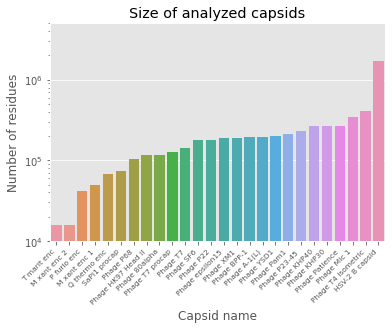

In [9]:
# Plot number of residues for each capsid
data = df_data
sns.barplot(data = df_data, x = 'Abbreviation', y = 'Residues', order = df_data.sort_values('Residues').Abbreviation)
plt.yscale('log')
plt.ylim(1E4,5E6)
plt.xticks(rotation = 45, fontsize = 7.5, ha = 'right')
plt.title('Size of analyzed capsids')
plt.xlabel('Capsid name')
plt.ylabel('Number of residues')

In [10]:
## Descriptive statistics for the number of residues in the capsids
df_data['Residues'].describe()

count    2.600000e+01
mean     2.262185e+05
std      3.134523e+05
min      1.590000e+04
25%      1.073550e+05
50%      1.839600e+05
75%      2.278500e+05
max      1.687980e+06
Name: Residues, dtype: float64

In [11]:
# Pair plot
#sns.pairplot(df_data)

## Memory usage versus protein shell size
The screening of the memory usage as a function of the protein shell size indicated a power law relationship (linear trend when plotting variables in a log-log plot).

Below we first calculate the linear regression model in the log-log space and then plot the data and the model.

In [12]:
# Exploratory plots

Text(0, 0.5, 'Memory usage (MB)')

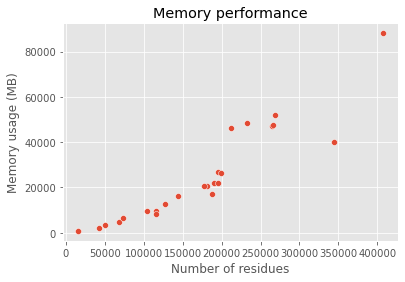

In [13]:
## Scatter in normal space
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')

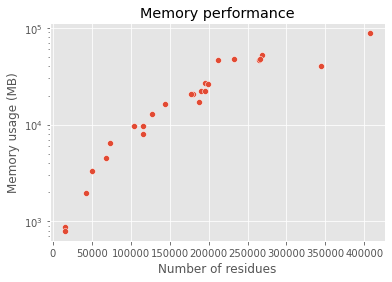

In [14]:
## Scatter plot in log-y space
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')
plt.yscale('log')

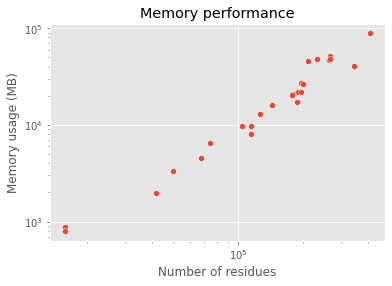

In [15]:
## Scatter plot in log-log space
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')
plt.yscale('log')
plt.xscale('log')

In [16]:
# Statistical model for Memory versus residues

In [17]:
## Check if the Memory value is missing for any of the entries
ID_no_memory = df_data[df_data['Memory_MB'].isnull()].index
print(ID_no_memory)

Index(['5zap'], dtype='object', name='PDB')


In [18]:
## Generate data frame excluding rows missing Memory estimate
df_data_memory_curated = df_data.drop(ID_no_memory)
len(df_data_memory_curated) # Number of valid data points

25

In [19]:
## Analyze regression 
data = df_data_memory_curated
xcol = 'Residues'
ycol = 'Memory_MB'
x = np.log10(data[xcol])
y = np.log10(data[ycol])
#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
model = stats.linregress(x,y)
print(model)

LinregressResult(slope=1.458408919713472, intercept=-3.3126284496332934, rvalue=0.9830891442578471, pvalue=1.847154369498616e-18, stderr=0.05664693342483889, intercept_stderr=0.29049321453556975)


In [20]:
### Generate points to represent the regression in normal space
slope = model.slope
intercept = model.intercept
x_min = data[xcol].min()
x_max = data[xcol].max()
logx = np.linspace(np.log10(x_min),np.log10(x_max),10)
logy = slope*logx + intercept
x_model = 10**logx
y_model = 10**logy

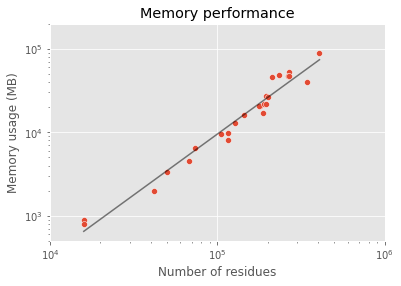

In [21]:
## Plot memory versus number of residues after analysis
sns.scatterplot(data = df_data, x = 'Residues', y = 'Memory_MB')
plt.title('Memory performance')
plt.xlabel('Number of residues')
plt.ylabel('Memory usage (MB)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1E4,1E6)
plt.ylim(5E2,2E5)
plt.plot(x_model,y_model,'k', alpha =0.5)

## Runtime versus number of residues

### General check of runtime data

In [22]:
# Missing values
ID_no_memory = df_data[df_data['Runtime'].isnull()].index
print(ID_no_memory)

Index(['5zap'], dtype='object', name='PDB')


In [23]:
# Remove missing values
df_data_curated = df_data.drop(ID_no_memory)

In [24]:
# Description of Runtime
df_data_curated['Runtime'].describe()

count        25.000000
mean      26553.880000
std       29674.202517
min         120.000000
25%        4343.000000
50%       20304.000000
75%       32662.000000
max      128000.000000
Name: Runtime, dtype: float64

### Exploratory plots

Text(0, 0.5, 'Runtime (sec)')

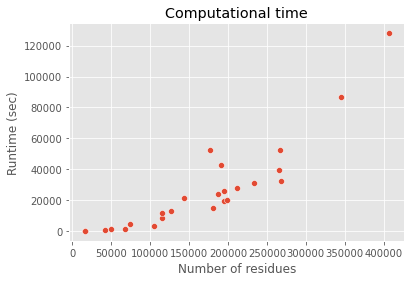

In [25]:
# Scatter plot
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')

**Assessment**
+ Runtime seems to increase with a power law or exponential.
+ A scaling analyis is most likely to lead to a power law.
+ However, let's check first the exponential case by plotting the data in the log-y versus x space.

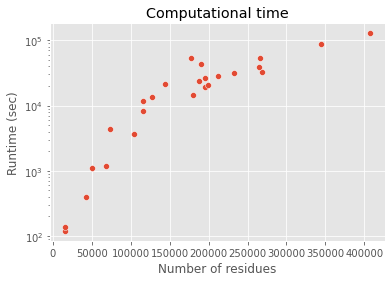

In [26]:
# Scatter plot (log-y versus x)
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')
plt.yscale('log')

** Assessment:**
+ The data tends to flatten. This indicates a non-exponential trend in the original data.

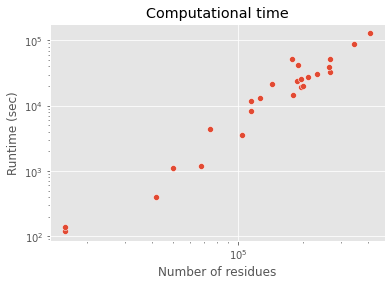

In [27]:
# Scatter plot (log-y versus log-x)
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')
plt.yscale('log')
plt.xscale('log')

**Assessment:**
+ The data displays an approximated linear trend in the log-log space.
+ This implies that the runtime follows a **power law**, which increases as the number of residues is larger.
+ A linear regerssion in the log-log space will yield the parameters.

### Statistical analysis

In [28]:
# Linear regression 
data = df_data_curated
xcol = 'Residues'
ycol = 'Runtime'
x = np.log10(data[xcol])
y = np.log10(data[ycol])
model = stats.linregress(x,y)
print(model)

LinregressResult(slope=2.196376620323567, intercept=-7.223094573131158, rvalue=0.976439700033712, pvalue=8.102281685747642e-17, stderr=0.10121145253708062, intercept_stderr=0.519026157599888)


In [29]:
# Generate points to represent the regression in normal space
slope = model.slope
intercept = model.intercept
x_min = data[xcol].min()
x_max = data[xcol].max()
logx = np.linspace(np.log10(x_min),np.log10(x_max),10)
logy = slope*logx + intercept
x_model = 10**logx
y_model = 10**logy

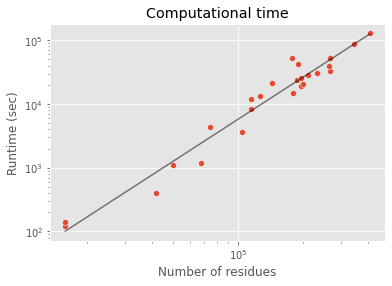

In [30]:
# Log-log scatter plot including the linear regression
sns.scatterplot(data = df_data_curated, x = 'Residues', y = 'Runtime')
plt.title('Computational time')
plt.xlabel('Number of residues')
plt.ylabel('Runtime (sec)')
plt.yscale('log')
plt.xscale('log')
plt.plot(x_model,y_model,'k', alpha =0.5)

## Accuracy analysis
Each generated coarse-grained model simulation was compared with the experimental model. More specifically, the thermal fluctuations (captured by the B-factors) were compared using the correlation coefficient as a metric. Here we analyze how the correlation coefficient changed as a function of the protein shell size and the resolution of the experimental data. We focus on the results from the unified elastic network model (uENM), which is the default in pyCapsid.

In [31]:
# Correlation coefficient (CC) overall description
df_data['CC_uENM'].describe()

count    26.000000
mean      0.517000
std       0.211278
min       0.100000
25%       0.360000
50%       0.468000
75%       0.673000
max       0.875000
Name: CC_uENM, dtype: float64

### Impact of capsid size

(0.0, 1.0)

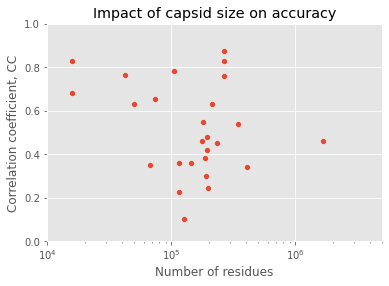

In [32]:
# Plot CC versus number of residues
sns.scatterplot(data = df_data, x = 'Residues', y = 'CC_uENM')
plt.title('Impact of capsid size on accuracy')
plt.xlabel('Number of residues')
plt.ylabel('Correlation coefficient, CC')
plt.xscale('log')
plt.xlim(1E4,5E6)
plt.ylim(0,1)

**Evaluation:**
+ The correlation coefficients seem to be quite scattered across number of residues.
+ If any correlation, it looks like it might be slightly negative, that is, lower CC values for larger capsids.
+ We will analyze the correlation between CC and number of residues to quantify if they are not correlated.

In [33]:
# Spearman's correlation
arr1 = np.array(df_data['Residues'])
arr2 = np.array(df_data['CC_uENM'])
result = stats.spearmanr(arr1,arr2)
print(result)

SpearmanrResult(correlation=-0.08982037111235272, pvalue=0.6625792351169228)


In [34]:
# Pearson's correlation
result = stats.pearsonr(arr1,arr2)
print(result)

(-0.08377179853316177, 0.6841089196641801)


In [35]:
# Pearson's correlation using log-x (logarithm of the number of residues)
result = stats.pearsonr(np.log10(arr1),arr2)
print(result)

(-0.25918293885864885, 0.20105063233221238)


**Evaluation:**
+ The three tests performed indicate that there is no statistical correlation between CC and the number of residues.
+ Thus, **capsid size does not impact the accuracy of pyCapsid**.

### Impact of the empirical resolution of the capsid reconstruction

In [36]:
# Overal description of the capsid resolutions
df_data['Resolution'].describe()

count    26.000000
mean      3.470000
std       0.657565
min       2.000000
25%       3.215000
50%       3.400000
75%       3.785000
max       5.200000
Name: Resolution, dtype: float64

(0.0, 1.0)

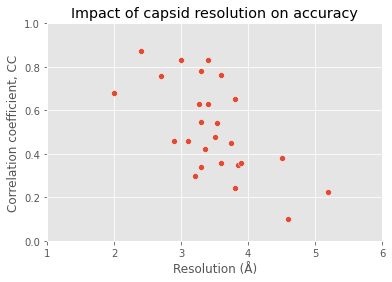

In [37]:
# Plot CC versus capsid resolution
fig = sns.scatterplot(data = df_data, x = 'Resolution', y = 'CC_uENM')
plt.title('Impact of capsid resolution on accuracy')
plt.xlabel('Resolution (Å)')
plt.ylabel('Correlation coefficient, CC')
plt.xlim(1,6)
plt.ylim(0,1)

**Evaluation:**
+ There seems to be a pronounced trend where CC decreases as the resolution worsens (larger values).
+ Let's quantify it with a linear regression analysis.

In [38]:
# Linear regression
x = df_data['Resolution']
y = df_data['CC_uENM']
model = stats.linregress(x,y)
print(model)

LinregressResult(slope=-0.20416103905715183, intercept=1.2254388055283167, rvalue=-0.6354160214639314, pvalue=0.0004867591310473059, stderr=0.050643300255344074, intercept_stderr=0.17874044367810663)


In [39]:
# Coefficient of determination (R^2)
R2 = model.rvalue**2
print(R2)

0.40375352033305134


(0.0, 1.0)

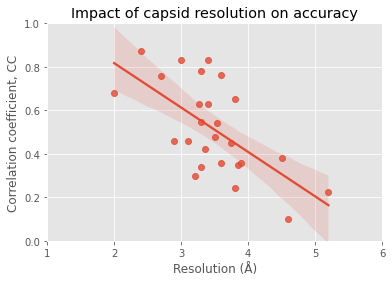

In [40]:
# Plot data including linear regression
sns.regplot(data = df_data, x = x, y = y)
plt.title('Impact of capsid resolution on accuracy')
plt.xlabel('Resolution (Å)')
plt.ylabel('Correlation coefficient, CC')
plt.xlim(1,6)
plt.ylim(0,1)

**Evaluation:**
+ There is a **strong negative correlation between the correlation coefficients as the resolution worsens**.
+ The slope is -0.20±0.05 1/Å (p-value = 0.0005 and R^2 = 0.40).
+ The intercept is 1.22±0.18, that is, **at perfect resolution (0 Å), one would expect pyCapsid to give B-factors perfectly consistent with the empirical results**.

## Benchmark with ProDy

+ To assees the improvement in the analysis of protein shells, we compared the runtime of pyCapsid with the gold standard in the field, ProDy.
+ Given the limitations of ProDy in handling protei shells with multiple chains, the results focus on relatively small capsids.

In [41]:
# Capsids used in the benchmarking analysis
df_data_bench = df_data[df_data['pyCap_bench'].notnull()]
df_data_bench

,Capsid,Abbreviation,Residues,MCPs,CPs,Reinforcement,Resolution,T-number,Spring_constant,Spring_stderr,...,CC_ANM,Clusters,Outliers,CQS,Icos_class,Memory,Runtime,pyCap_bench,ProDy_bench,Memory_MB
PDB,,,,,,,,,,,,,,,,,,,,,
7kq5,Thermatoga maritima encapsulin,T marit enc,15900,60,60,NaN,2.00,1,2.00,0.30,...,0.088,120,NaN,4.9,1 H,840.0,120.0,109.0,231.0,880.803840
2e0z,Pyrococcus furiosus VLP,P furio enc,42000,180,180,NaN,3.60,3,0.64,0.08,...,0.700,32,NaN,350.0,3 H,1880.0,400.0,182.0,904.0,1971.322880
6nj8,Quasibacillus thermotolerans encapsulin,Q thermo enc,67740,240,240,NaN,3.85,4,0.47,0.06,...,0.280,42,NaN,6.7,4 H,4317.5,1180.0,624.0,1712.0,4527.226880
6b23,Staphylococcus aureus pathogenicity island 1 p...,SaPI1 procap,73920,240,240,NaN,3.80,4,6.10,0.70,...,NaN,240,60.0,26.4,NaN,6181.0,4343.0,625.0,3639.0,6481.248256


(-100.0, 4000.0)

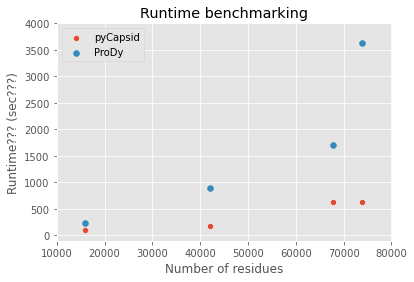

In [42]:
# Plot benchmarking as a function of the number of residues
sns.scatterplot(data = df_data_bench, x = 'Residues', y ='pyCap_bench')
plt.scatter(x = df_data['Residues'], y = df_data['ProDy_bench'])
plt.title('Runtime benchmarking')
plt.xlabel('Number of residues')
plt.ylabel('Runtime??? (sec???)')
plt.legend(['pyCapsid','ProDy'])
#plt.yscale('log')
#plt.xscale('log')
plt.xlim(10000,80000)
plt.ylim(-100,4000)

**Assessment:**
+ The ProDy's runtime is larger than pyCapsid's runtime.
+ The increase in runtime for ProDy is particularly pronounced for the larger capsids used for benchmarking (~70,000 residues).
+ Analyze below the the ratio of runtime improvement for pyCapsid.
+ <span style = "color: red"> **Question: Do we have a similar benchmarking for memory? Isn't that the main bottleneck?** </span>

In [43]:
# Obtain runtime improvement
# Defined as runtime_Prody/runtime_pyCapsid = how much slower is ProDy = how much faster is pyCapsid
df_data_bench['Relative_speed'] = df_data_bench.apply(lambda row: row['ProDy_bench']/row['pyCap_bench'], axis = 1)

/var/folders/zj/kj2j_txx7lg33sf1jkzpp97c0000gs/T/ipykernel_30248/2680212879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_bench['Relative_speed'] = df_data_bench.apply(lambda row: row['ProDy_bench']/row['pyCap_bench'], axis = 1)


In [44]:
df_data_bench

,Capsid,Abbreviation,Residues,MCPs,CPs,Reinforcement,Resolution,T-number,Spring_constant,Spring_stderr,...,Clusters,Outliers,CQS,Icos_class,Memory,Runtime,pyCap_bench,ProDy_bench,Memory_MB,Relative_speed
PDB,,,,,,,,,,,,,,,,,,,,,
7kq5,Thermatoga maritima encapsulin,T marit enc,15900,60,60,NaN,2.00,1,2.00,0.30,...,120,NaN,4.9,1 H,840.0,120.0,109.0,231.0,880.803840,2.119266
2e0z,Pyrococcus furiosus VLP,P furio enc,42000,180,180,NaN,3.60,3,0.64,0.08,...,32,NaN,350.0,3 H,1880.0,400.0,182.0,904.0,1971.322880,4.967033
6nj8,Quasibacillus thermotolerans encapsulin,Q thermo enc,67740,240,240,NaN,3.85,4,0.47,0.06,...,42,NaN,6.7,4 H,4317.5,1180.0,624.0,1712.0,4527.226880,2.743590
6b23,Staphylococcus aureus pathogenicity island 1 p...,SaPI1 procap,73920,240,240,NaN,3.80,4,6.10,0.70,...,240,60.0,26.4,NaN,6181.0,4343.0,625.0,3639.0,6481.248256,5.822400


In [45]:
df_data_bench[['pyCap_bench','ProDy_bench','Relative_speed']]

,pyCap_bench,ProDy_bench,Relative_speed
PDB,,,
7kq5,109.0,231.0,2.119266
2e0z,182.0,904.0,4.967033
6nj8,624.0,1712.0,2.743590
6b23,625.0,3639.0,5.822400


<AxesSubplot:xlabel='Residues', ylabel='Relative_speed'>

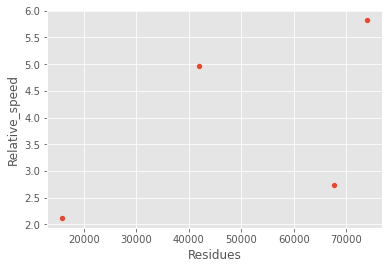

In [46]:
# Plot the runtime improvement based on residues
sns.scatterplot(data = df_data_bench, x = 'Residues', y = 'Relative_speed')

<AxesSubplot:xlabel='CPs', ylabel='Relative_speed'>

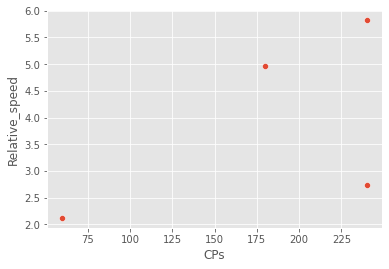

In [47]:
# Plot the runtime improvement based on number of proteins
sns.scatterplot(data = df_data_bench, x = 'CPs', y = 'Relative_speed')

In [48]:
# Statistical description of runtime improvement
df_data_bench['Relative_speed'].describe()

count    4.000000
mean     3.913072
std      1.764634
min      2.119266
25%      2.587509
50%      3.855311
75%      5.180875
max      5.822400
Name: Relative_speed, dtype: float64

**Assessment:**
+ pyCapsid improves approximately from 2 to 6 fold the runtime to generate normal modes for capsids.
+ The improvement seems to increase based on the number of residues or number of proteins in the capsid.
+ <font color = 'red'> **Question: What is going on capsid 6nj8? That one seems off, why?**</font>